In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
movies_df = pd.read_csv('imdb_top_1000.csv')
movies_df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### Data Preprocessing

In [5]:
movies_df.duplicated().sum()

0

In [6]:
movies_df = movies_df.drop(['Poster_Link', 'Certificate', 'Overview', 'Certificate', 'Runtime', 'Gross'], axis=1)

In [7]:
movies_df.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845


In [8]:
movies_df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [9]:
movies_df[movies_df['Released_Year']=='PG']

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes
966,Apollo 13,PG,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197


In [10]:
movies_df['Released_Year'].replace({'PG':'1995'},inplace=True)

In [11]:
movies_df['Released_Year']=movies_df['Released_Year'].astype(int)

##### Each movie has its own set of labels which are combined into a single string. We want to ensure that each genre is its own string.

In [13]:
genres = movies_df['Genre'].unique().tolist()

In [14]:
y=[i.split(', ') for i in genres]

In [15]:
genres = []
for i in y:
    for j in i:
        genres.append(j)

In [16]:
genres_set = set(genres)

In [17]:
genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']

## Exploratory Data Analysis

### What movie is rated highest on IMDB?

In [20]:
mean_ratings = movies_df.groupby('Series_Title')[['IMDB_Rating']].mean()

In [21]:
highest_rated = mean_ratings['IMDB_Rating'].idxmax()
movies_df[movies_df['Series_Title']==highest_rated]

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110


### 'The Shawshank Redemption' is the highest rated movie with a IMDB rating of 9.3

#### Below is a summary of highest rated movies on IMDB.

In [24]:
movies_df.groupby('Series_Title',sort=False)[['IMDB_Rating']].mean().reset_index().head(10)

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
8,Inception,8.8
9,Fight Club,8.8


### Who is listed as the lead actor most frequently?

In [26]:
movies_df.groupby('Star1')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

,Star1,Series_Title
605,Tom Hanks,12
514,Robert De Niro,11
135,Clint Eastwood,10
9,Al Pacino,10
382,Leonardo DiCaprio,9
262,Humphrey Bogart,9
327,Johnny Depp,8
282,James Stewart,8
128,Christian Bale,8
612,Toshirô Mifune,7


#### Tom Hanks is the most frequently listed lead actor.

In [28]:
movies_df.groupby('Star2')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

,Star2,Series_Title
206,Emma Watson,7
521,Matt Damon,5
164,Diane Keaton,4
300,Ian McKellen,4
81,Brad Pitt,4
183,Ed Harris,4
418,Julie Delpy,4
428,Kate Winslet,4
119,Chris Evans,4
535,Meryl Streep,4


In [29]:
movies_df.groupby('Star3')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

,Star3,Series_Title
727,Rupert Grint,5
111,Carrie Fisher,4
756,Scarlett Johansson,4
666,Rachel McAdams,4
396,John Goodman,4
385,Joe Pesci,4
364,Jennifer Connelly,4
749,Samuel L. Jackson,4
568,Michael Madsen,3
702,Robert De Niro,3


In [30]:
movies_df.groupby('Star4')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

,Star4,Series_Title
620,Michael Caine,4
136,Catherine Keener,3
585,Mark Ruffalo,3
420,John Castle,2
637,Milhem Cortaz,2
87,Bill Nighy,2
85,Bill McKinney,2
194,Diane Keaton,2
755,Rooney Mara,2
752,Rod Steiger,2


#### Emma Watson is the most frequently listed supporting actor

#### Below we see a summary of the movies with the highest and lowest number of votes

In [33]:
movies_df.groupby('Series_Title')[['No_of_Votes']].mean().reset_index().sort_values(by='No_of_Votes',ascending=False)

,Series_Title,No_of_Votes
875,The Shawshank Redemption,2343110.0
766,The Dark Knight,2303232.0
374,Inception,2067042.0
274,Fight Club,1854740.0
620,Pulp Fiction,1826188.0
...,...,...
623,Raazi,25344.0
660,Scarface: The Shame of the Nation,25312.0
452,La planète sauvage,25229.0
306,God's Own Country,25198.0


In [34]:
movies_df.groupby('Director')[['Series_Title']].count().reset_index().sort_values(by='Series_Title',ascending=False).head(10)

,Director,Series_Title
22,Alfred Hitchcock,14
470,Steven Spielberg,13
179,Hayao Miyazaki,11
313,Martin Scorsese,10
9,Akira Kurosawa,10
463,Stanley Kubrick,9
532,Woody Allen,9
49,Billy Wilder,9
391,Quentin Tarantino,8
83,Christopher Nolan,8


#### Alfred Hitchcock directed the highest number of movies

In [36]:
avg_rating_by_genre = movies_df.groupby('Genre')[['IMDB_Rating']].mean()
avg_rating_by_genre.sort_values(by='IMDB_Rating',ascending=False).reset_index()

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
...,...,...
197,"Adventure, Comedy, War",7.60
198,"Animation, Comedy, Crime",7.60
199,"Action, Adventure, Family",7.60
200,"Animation, Drama, Romance",7.60


In [37]:
avg_rating_by_genre = movies_df.groupby('Genre')
most_voted = movies_df['No_of_Votes'].max()
average = movies_df['IMDB_Rating'].mean()
highest_metascore = movies_df.groupby('Genre')[['IMDB_Rating']].max()#movies_df['Meta_score'].max()
print(f"Average rating across all genres: {round(average,1)}")
print(f"Movie with highest number of votes: {highest_rated}")

Average rating across all genres: 7.9
Movie with highest number of votes: The Shawshank Redemption


In [38]:
genres = np.unique(', '.join(movies_df['Genre']).split(', '))
genres = np.delete(genres, np.where(genres == 'NA'))

In [39]:
for genre in genres:
    movies_df[genre] = movies_df['Genre'].str.contains(genre).astype('int')

movies_df.drop('Genre', axis=1, inplace=True)

In [40]:
movies_df

,Series_Title,Released_Year,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,2008,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,1974,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1957,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,...,0,0,0,0,1,0,0,0,0,0
996,Giant,1956,7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,...,0,0,0,0,0,0,0,0,0,1
997,From Here to Eternity,1953,7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,...,0,0,0,0,1,0,0,0,1,0
998,Lifeboat,1944,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,...,0,0,0,0,0,0,0,0,1,0


In [41]:
sum_of_genre_entries = []

for genre in genres:
    count = len(movies_df[movies_df[genre] == 1])
    sum_of_genre_entries.append(count)

print(f"{genres.tolist()} \n {sum_of_genre_entries}")

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'] 
 [189, 196, 82, 109, 233, 209, 724, 56, 66, 19, 56, 32, 47, 17, 99, 125, 67, 19, 137, 51, 20]


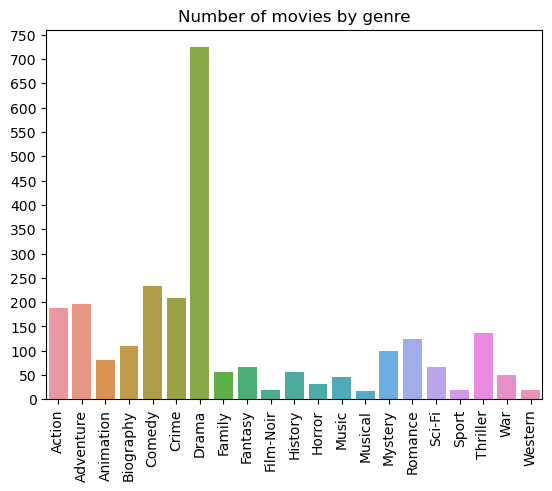

In [42]:
sns.barplot(x=genres,y=sum_of_genre_entries)
plt.xticks(rotation=90)
yticks = np.arange(0, 800,50)
plt.yticks(ticks=yticks)
plt.title("Number of movies by genre")
plt.show();

#### Drama dominates the list followed by Comedy and Crime.

In [44]:
year_int = [int(s) for s in movies_df['Released_Year']]

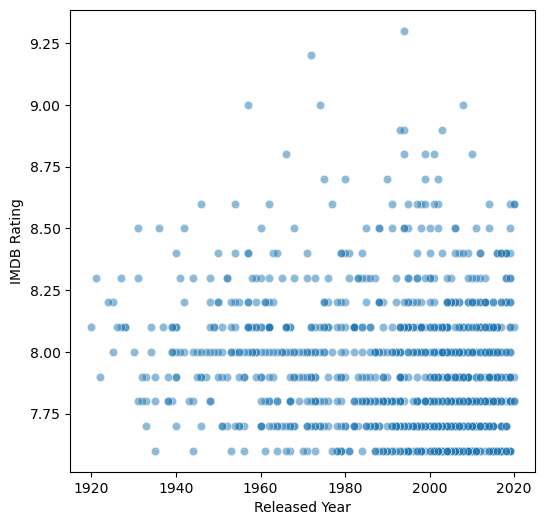

In [45]:
plt.figure(figsize=(6, 6))
sns.scatterplot(movies_df, x=year_int,y='IMDB_Rating',alpha=.5)
plt.xlabel("Released Year")
plt.ylabel("IMDB Rating");

### We see that the majority of movies rated 8.5 were released around the early 2000s.

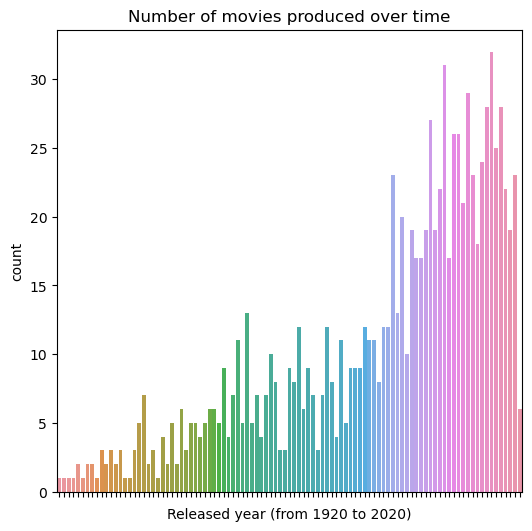

In [91]:
plt.figure(figsize=(6, 6))
ax = plt.gca()

sns.countplot(data=movies_df, x='Released_Year', ax=ax)

ax.set_xticklabels([])
ax.set_xticks(ax.get_xticks())
plt.xlabel("Released year (from 1920 to 2020)")
plt.title("Number of movies produced over time")

plt.show()

### Unsurprisingly, the frequency of movies produced has increased since the early days of cinema.